In [1]:
import os
import sys

import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec

get_ipython().magic(u'matplotlib inline')

sys.path.append('../3_analyze')
from containers import Dataset
from score_query import ScoreQuery
from utils import export, show_side_by_side, load_score_file
from statistics import *
from prob_opt import LigSet, PredictStructs

sys.path.append('../1_dock')
from parse_chembl import load_chembl_raw, load_chembl_proc
from core_proc import load_matches

In [28]:
data = '/scratch/PI/rondror/jbelk/method/data'
glide_dir = 'docking/glide12'
ifp_dir = 'ifp/ifp1'
mcss_dir = 'mcss/mcss1'

struct_dict = {'D2R':'6CM4','AR':'2PNU','A2AR':'2YDO','B1AR':'2VT4','B2AR':'2RH1','CHK1':'2BRN', 'PLK1':'2OWB',
               'VITD':'2HB7','BRAF':'3IDP','JAK2':'3KRR','CDK2':'1H1S','ERA':'1A52','GCR':'3K23'}

features = {
    #'mcss':[],
    #'hbond':[2,3],
    'sb':[4],
    'pipi':[6]
    #'contact':[11]
}

In [29]:
stats_prots = ['B1AR']
pred_prot = 'D2R'
load_prots = list(set(stats_prots + [pred_prot]))

num_poses = 25

all_data = Dataset(data, load_prots)
all_data.load_docking(glide_dir, ifp_dir, mcss_dir, structs=struct_dict,
                      load_fp=True, load_crystal=False, load_chembl=True, load_mcss=True)

stats = Statistics(all_data, stats_prots, 20, 100, features)

#for f_name in features.keys():
#    print f_name
#    stats.show_stats(f_name, raw=False, smoothed=True)

for s, st in all_data.proteins[pred_prot].docking.items():
    
    l_list = ['CHEMBL{}_lig'.format(x) for x in [297302,1108,54,2107117,267930,267932]]
    pred_ligs = {l:st.ligands[l] for l in l_list}

    ls = LigSet(pred_ligs, num_poses, features, st.mcss, t=10)

    ps = PredictStructs(ls, stats.evidence, features)
    best_cluster, en_landscape = ps.max_posterior(verbose=True, sampling=3, en_landscape=False)

no ki found for CHEMBL567_lig drug?
no ki found for CHEMBL2219425_lig drug?
no ki found for CHEMBL1200940_lig drug?
no ki found for CHEMBL1200587_lig drug?
no ki found for CHEMBL1201154_lig drug?
no ki found for CHEMBL1201102_lig drug?
no ki found for CHEMBL1200902_lig drug?
no ki found for CHEMBL1201074_lig drug?
no ki found for CHEMBL3544974_lig drug?
no ki found for CHEMBL1200792_lig drug?
no ki found for CHEMBL1201_lig drug?
no ki found for CHEMBL2105760_lig drug?
no ki found for CHEMBL1201052_lig drug?
no ki found for CHEMBL1200911_lig drug?
no ki found for CHEMBL14376_lig drug?
no ki found for CHEMBL570_lig drug?
no ki found for CHEMBL2107117_lig drug?
no ki found for CHEMBL1200419_lig drug?
no ki found for CHEMBL1621_lig drug?
no ki found for CHEMBL2358147_lig drug?
no ki found for CHEMBL1615372_lig drug?
no ki found for CHEMBL1201087_lig drug?
no ki found for CHEMBL1200854_lig drug?
no ki found for CHEMBL1712_lig drug?
no ki found for CHEMBL1200707_lig drug?
no ki found for CHE

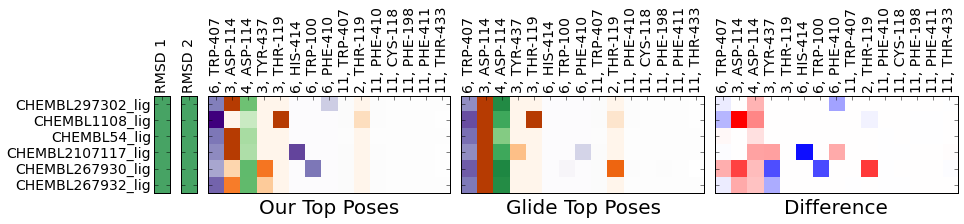

In [30]:
us_top = {l:lig.poses[best_cluster[l]] for l,lig in pred_ligs.items()}
glide_top = {l:lig.poses[0] for l,lig in pred_ligs.items()}

all_data.assign_weights({2:1,3:1,4:1,6:1,11:0.001})

show_side_by_side(us_top, glide_top, l_list, 
                  t1='Our Top Poses', t2='Glide Top Poses', num_i=15)

# this will show up in /scratch/PI/rondror/jbelk/method/outputs
#export(data, us_top, 'd2r_us_20181503', pred_prot, 
#       struct=struct_dict[pred_prot], verbose=False, glide_dir=glide_dir)
#export(data, glide_top, 'd2r_glide_20181503', pred_prot, 
#       struct=struct_dict[pred_prot], verbose=False, glide_dir=glide_dir)